# Import Dependencies

In [55]:
import pandas as pd
import numpy as np

# Load the Dataset

In [14]:
train = pd.read_csv('train.csv')

# Display Sample Rows

In [15]:
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

## Graphical Plots

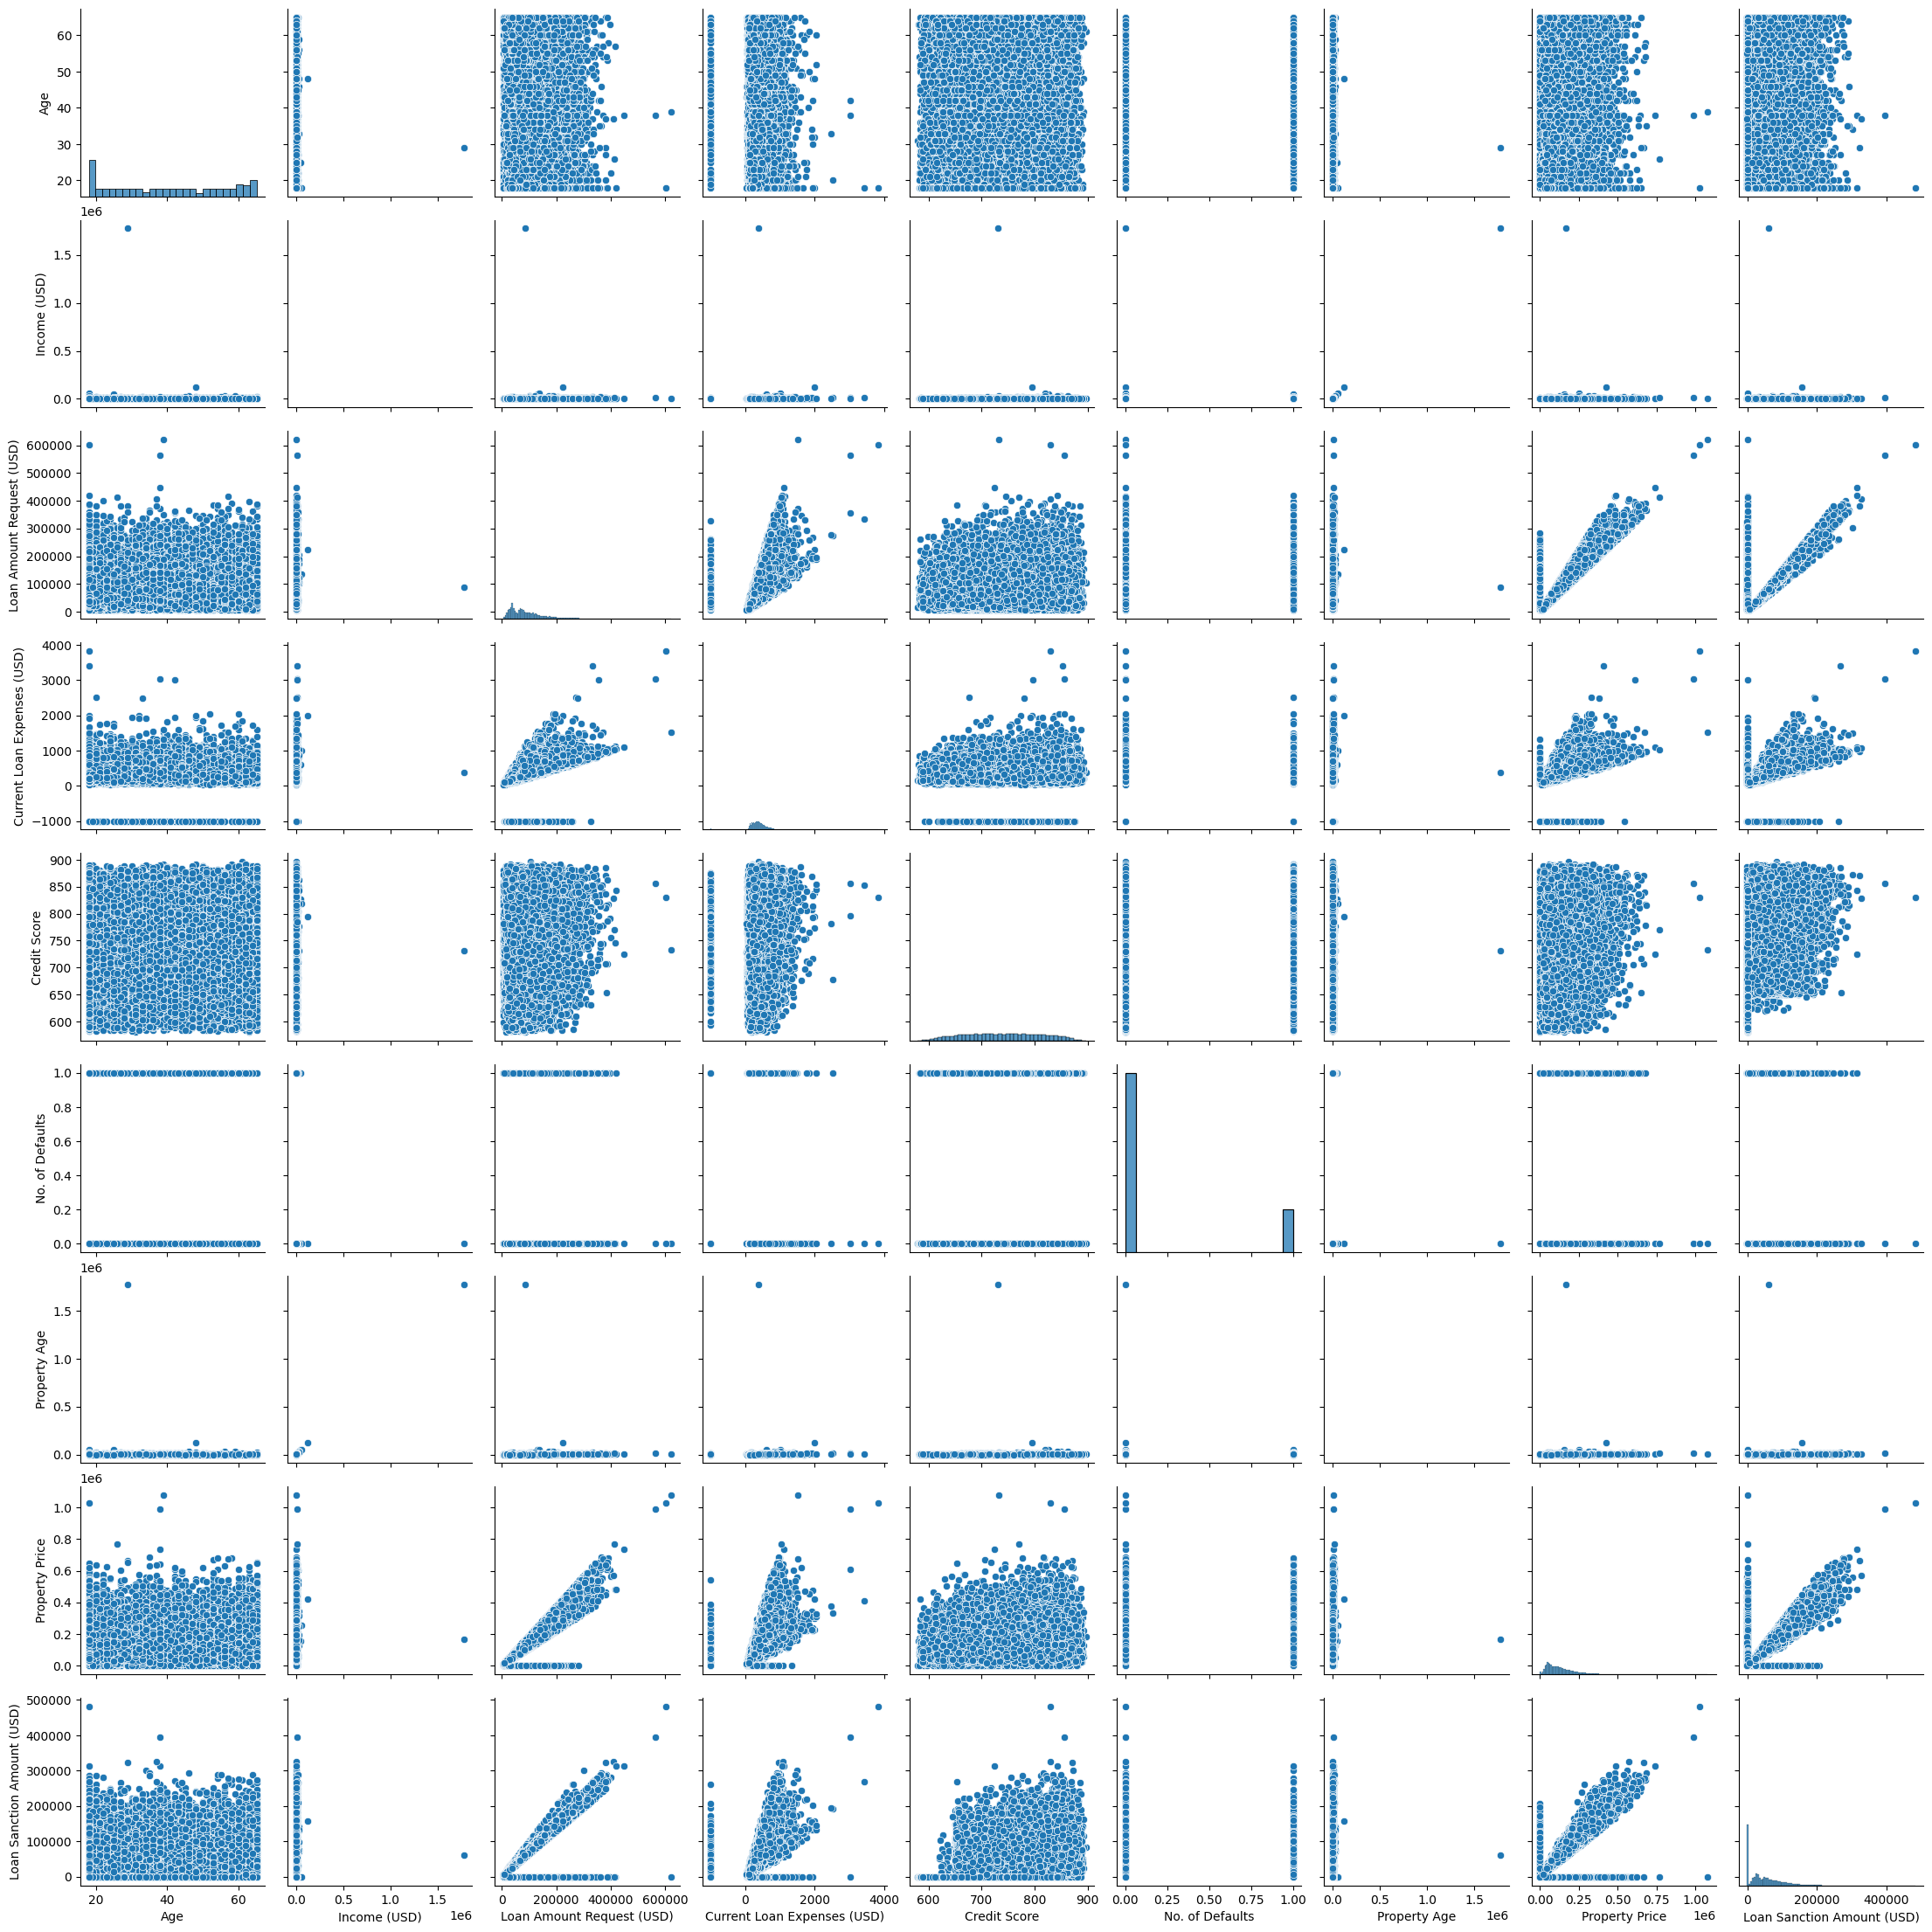

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Numerical Features
numerical_features = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
                      'Credit Score', 'No. of Defaults', 'Property Age', 'Property Price', 'Loan Sanction Amount (USD)']
sns.pairplot(train[numerical_features])
plt.show()

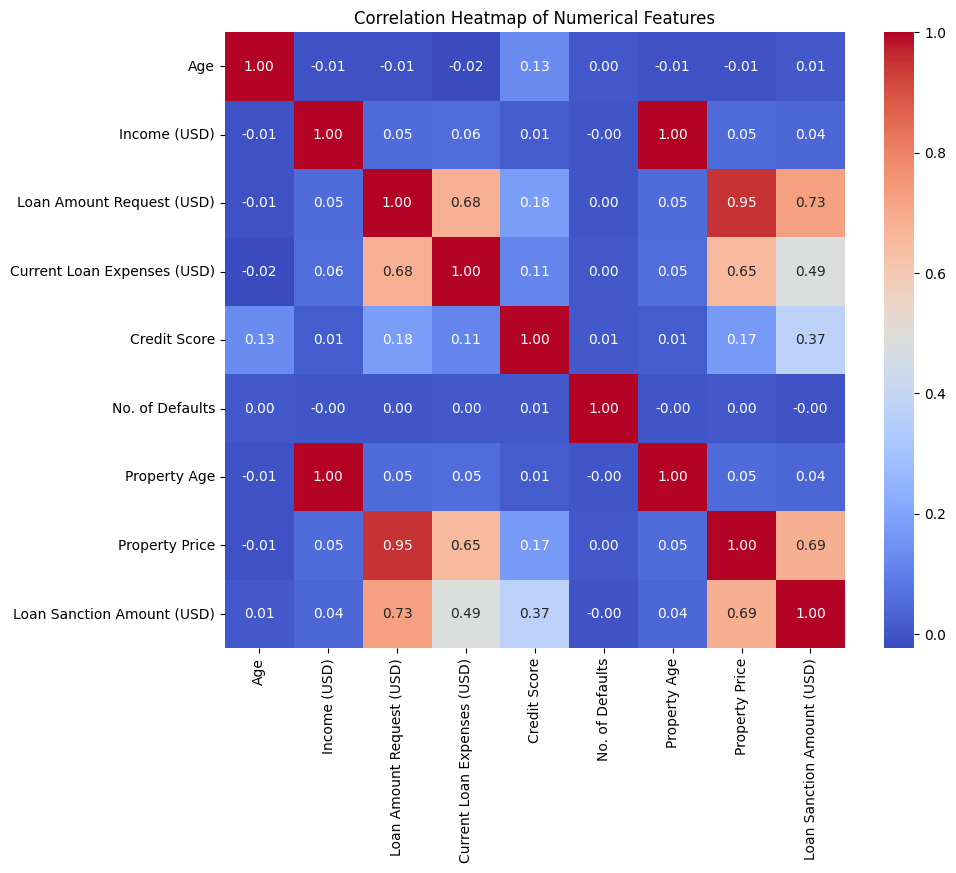

In [18]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

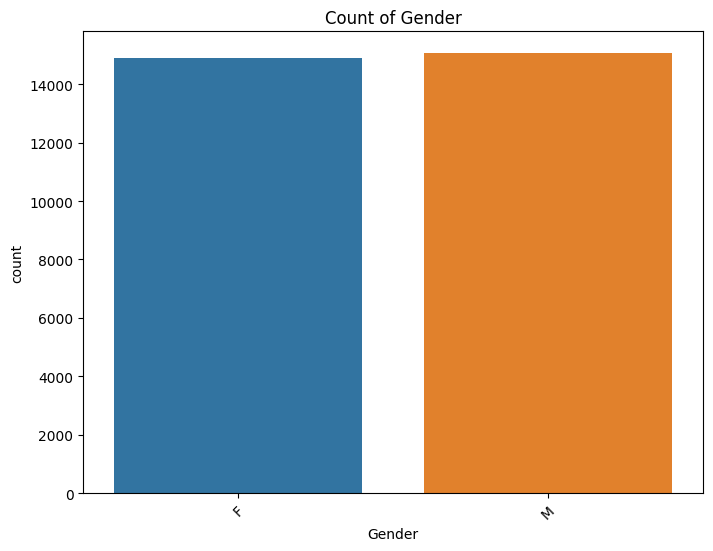

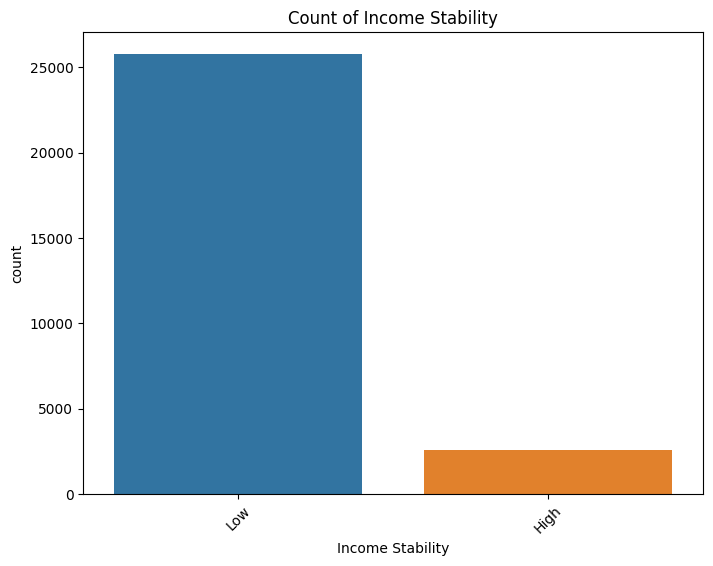

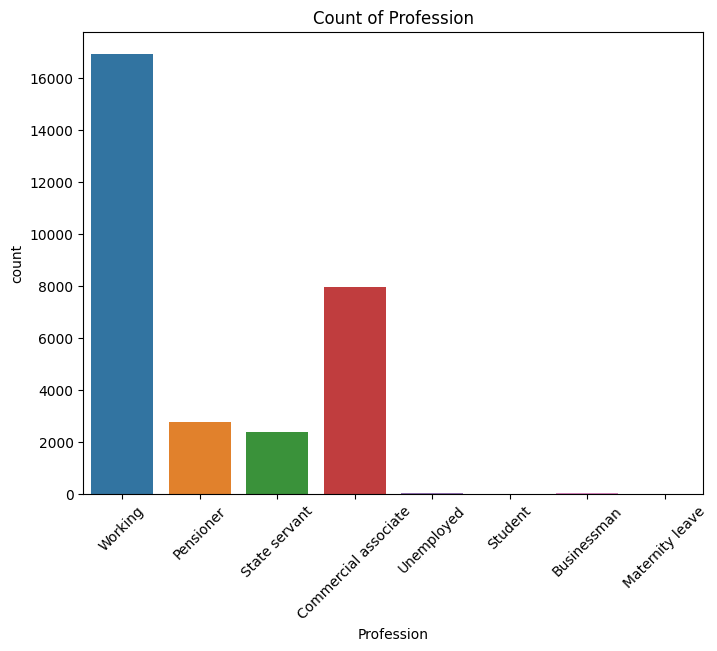

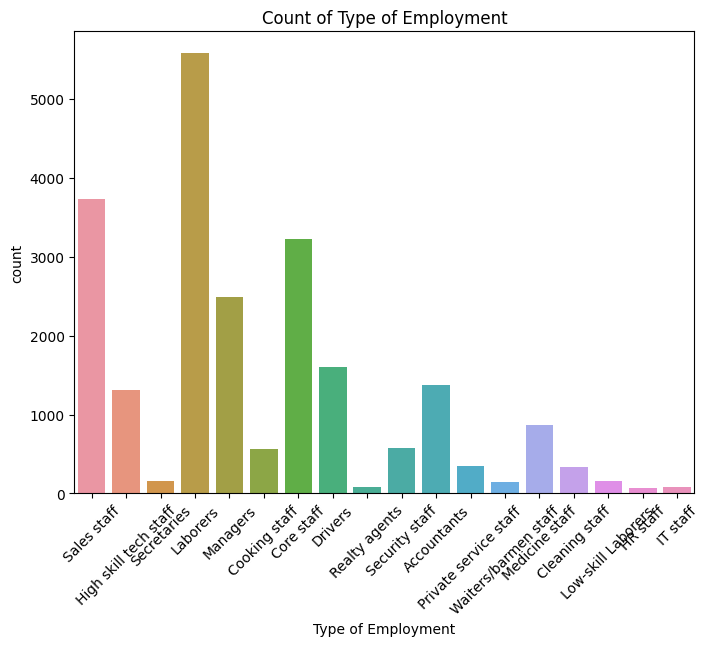

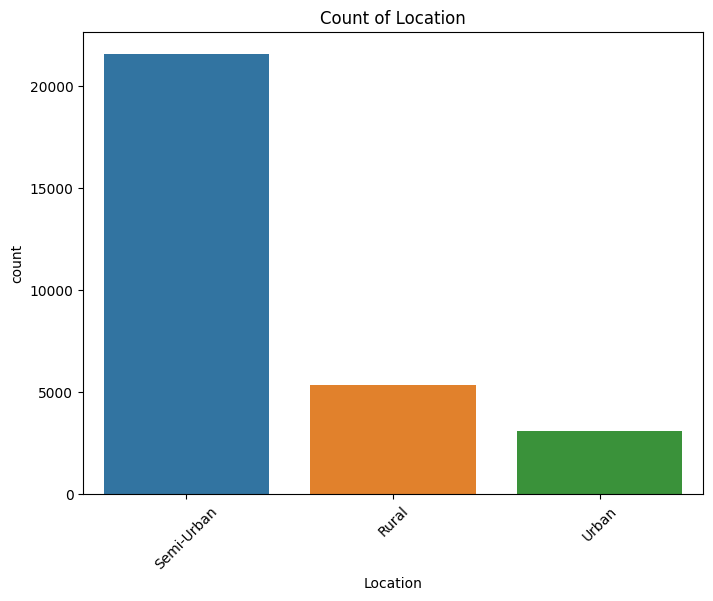

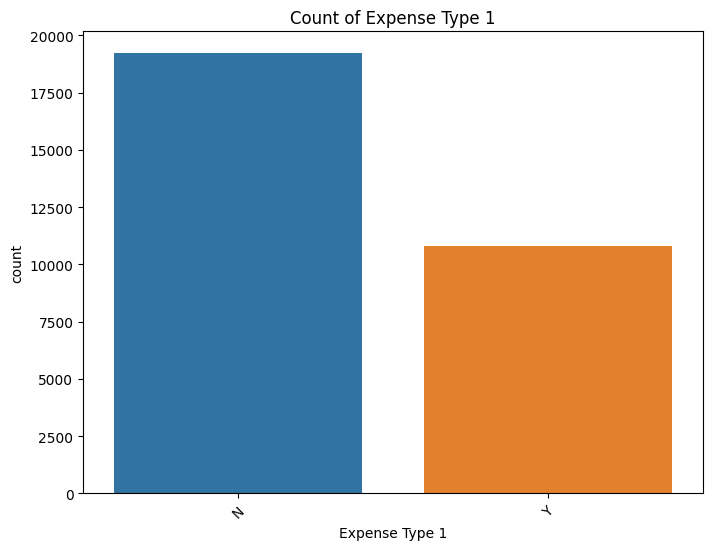

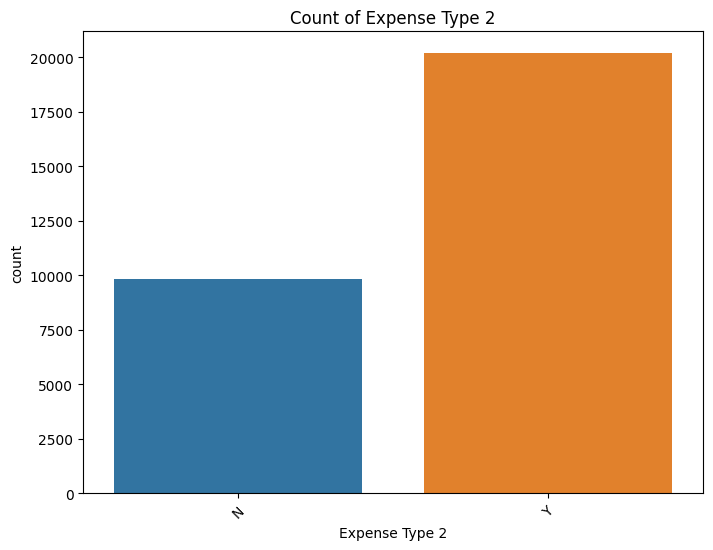

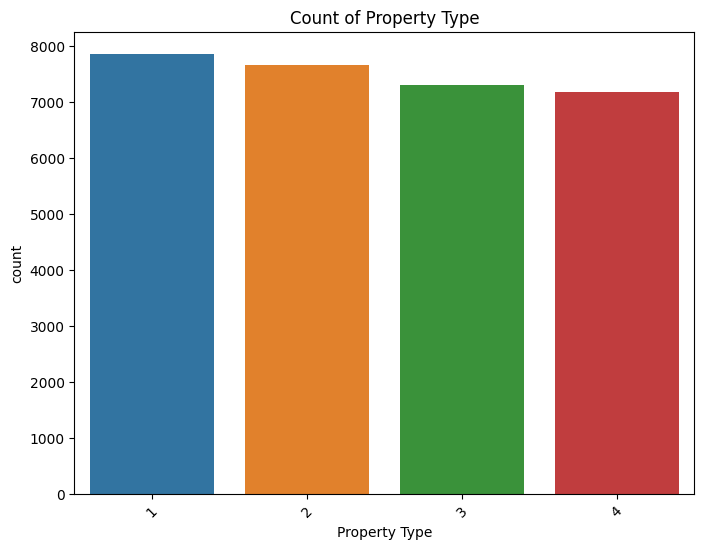

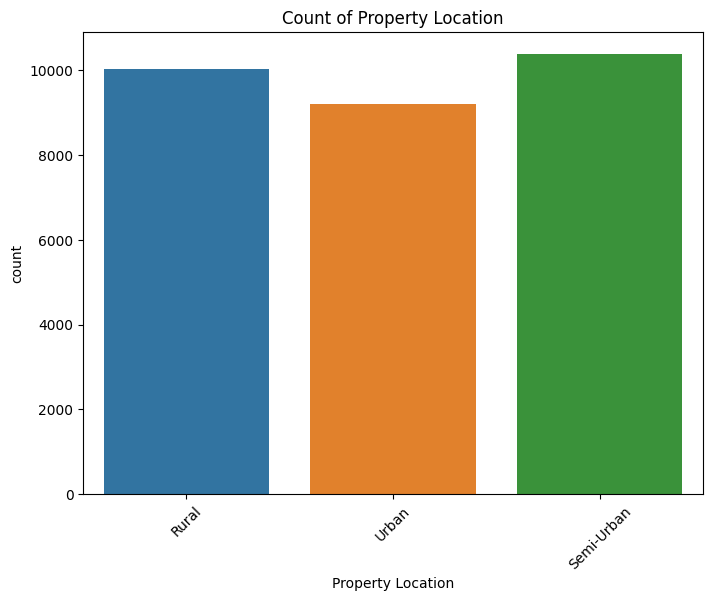

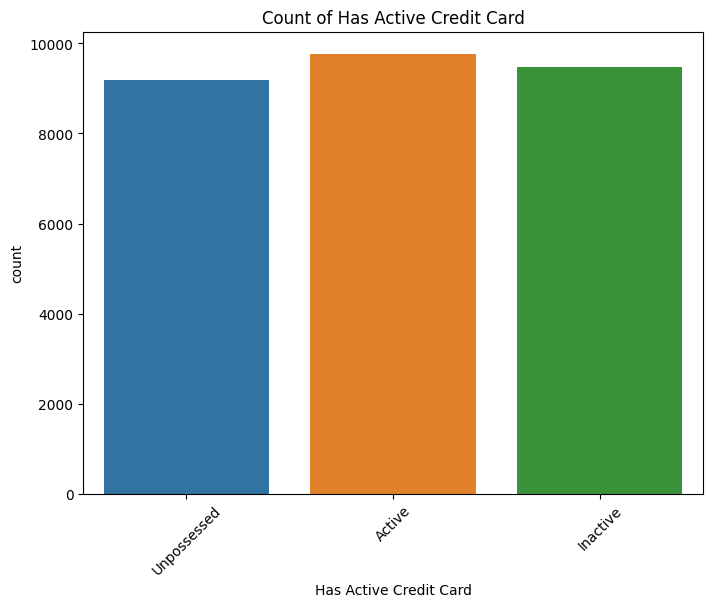

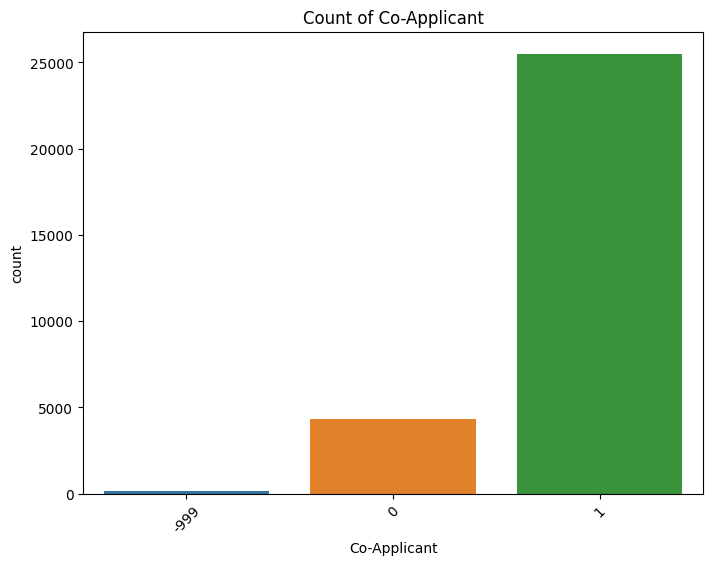

In [19]:
# Count of Categorical Features
categorical_features = ['Gender', 'Income Stability', 'Profession', 'Type of Employment',
                        'Location', 'Expense Type 1', 'Expense Type 2', 'Property Type',
                        'Property Location', 'Has Active Credit Card', 'Co-Applicant']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()

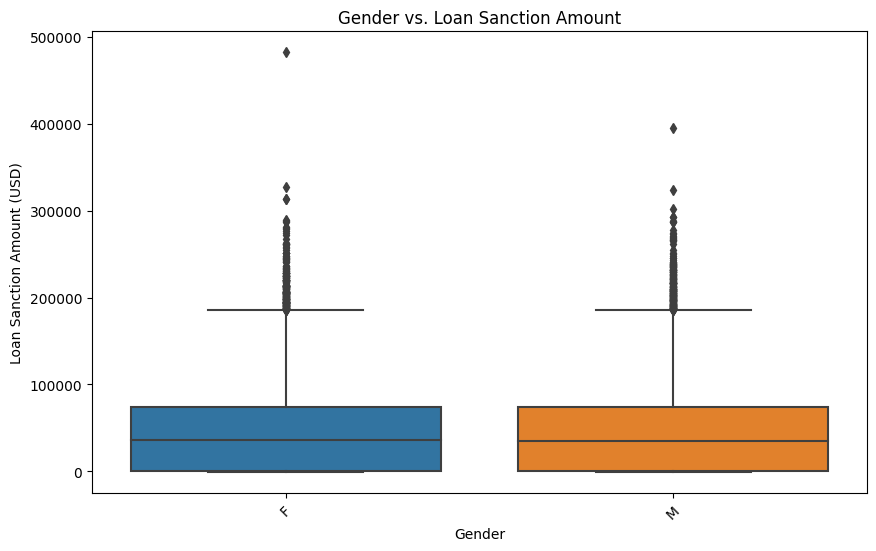

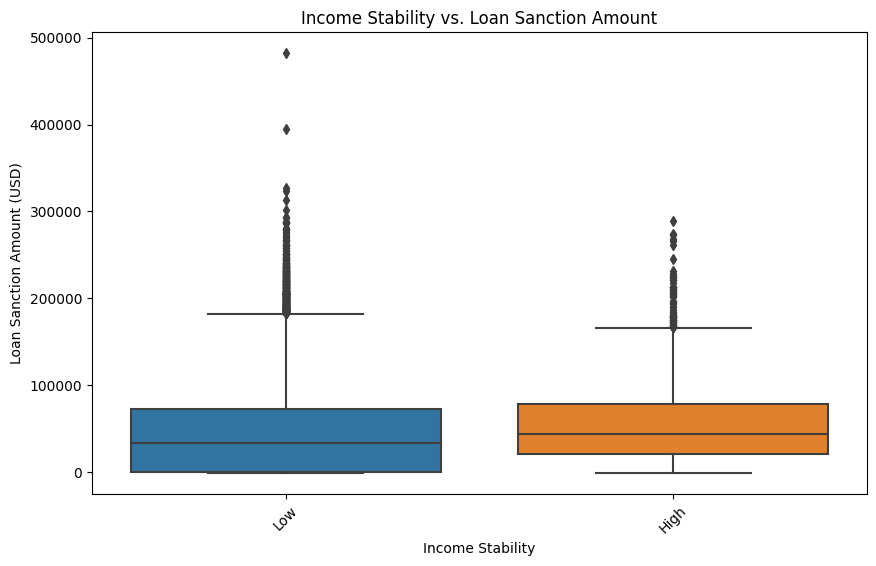

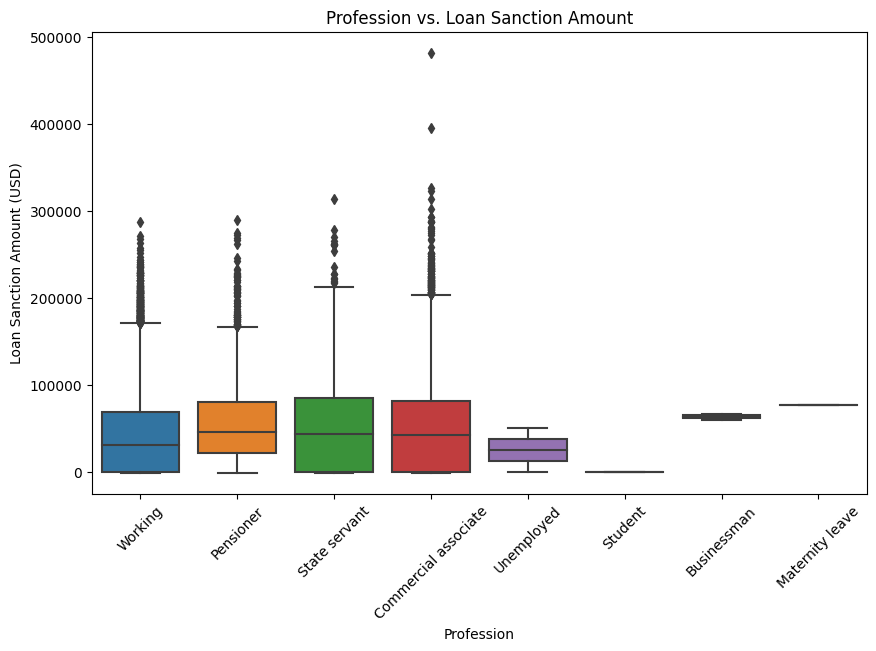

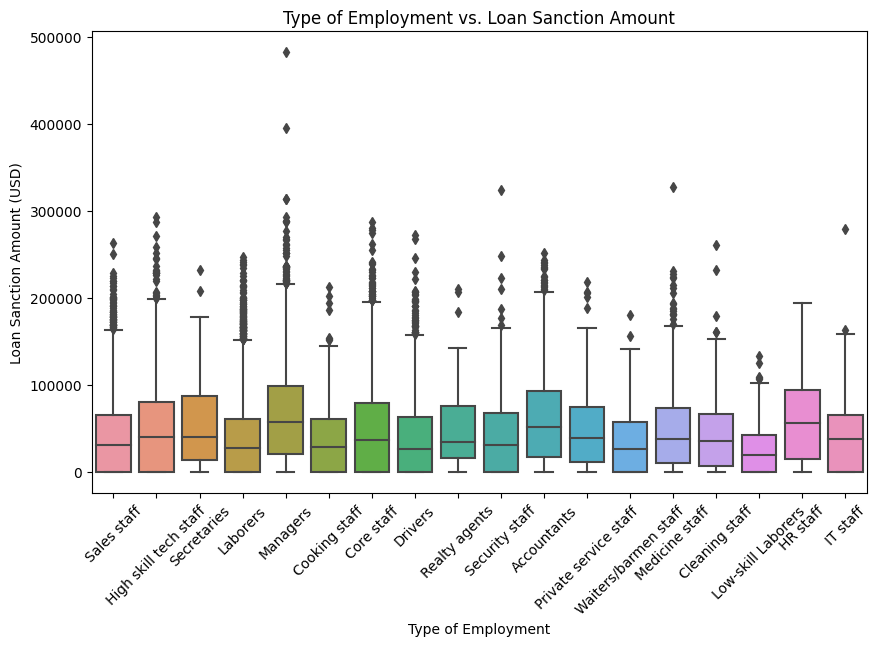

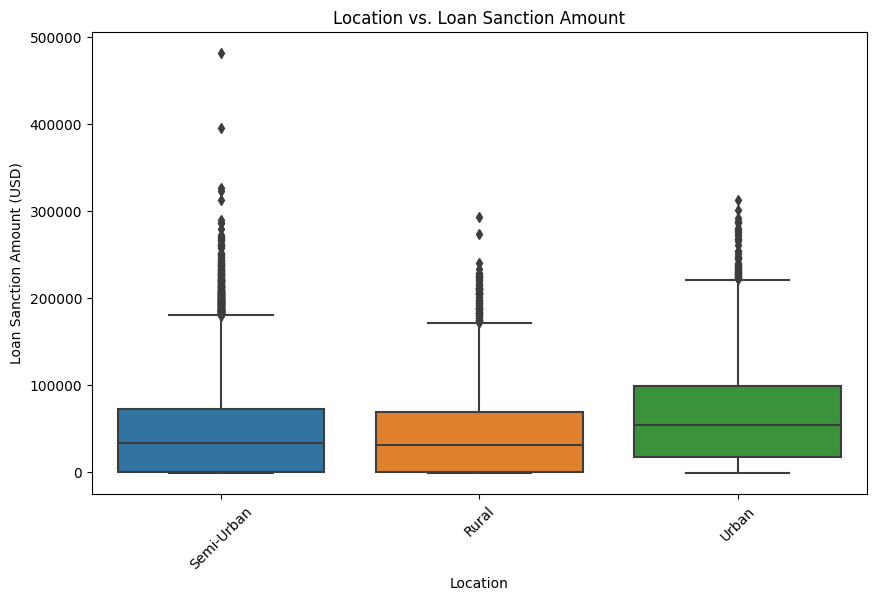

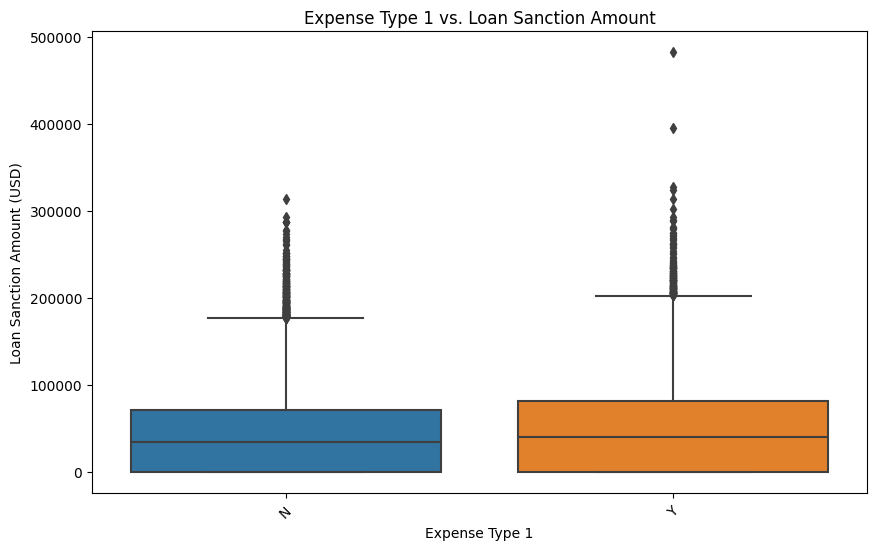

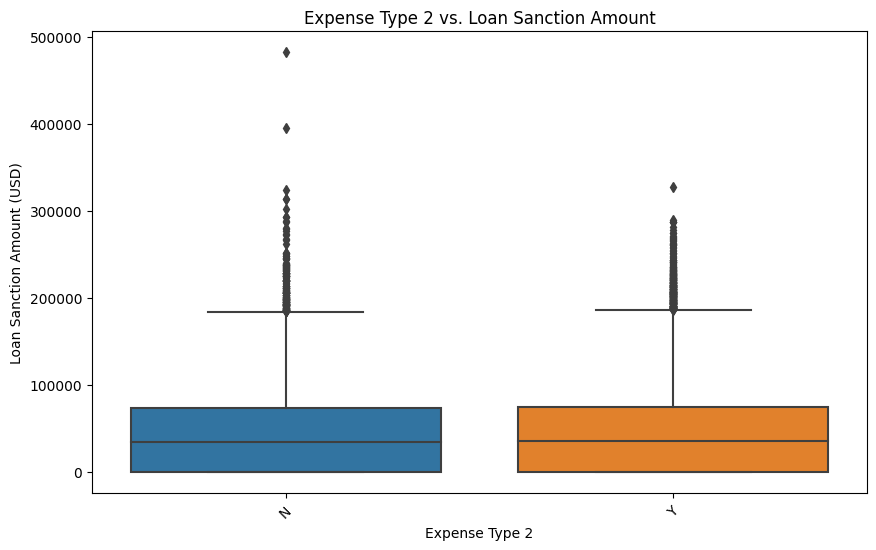

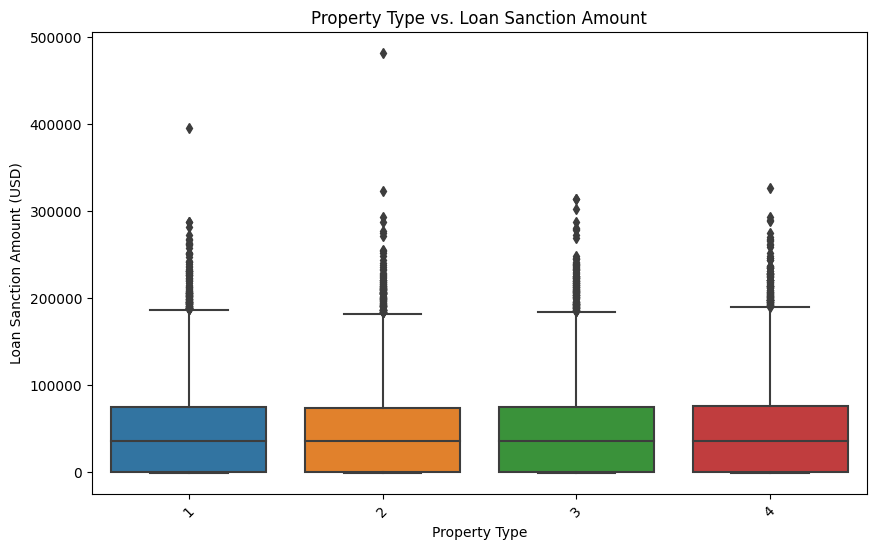

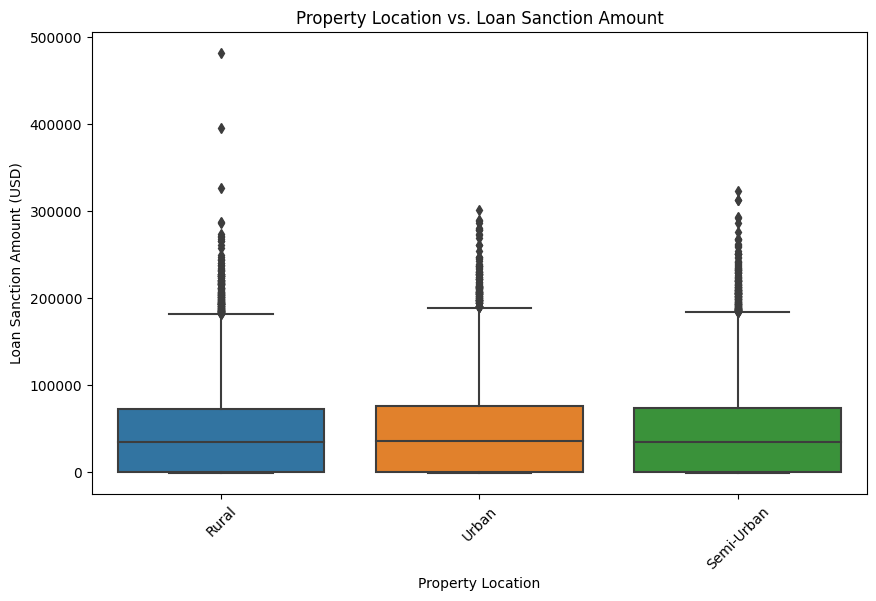

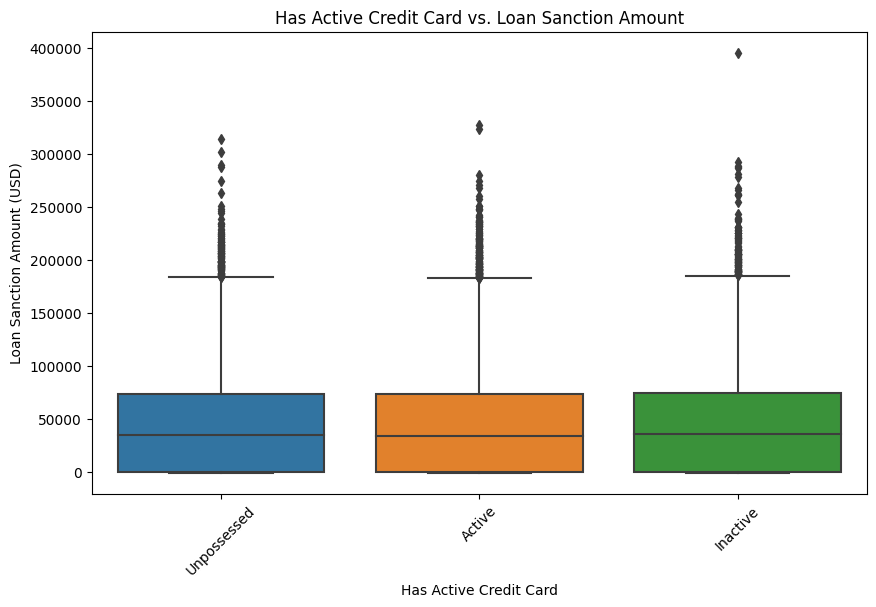

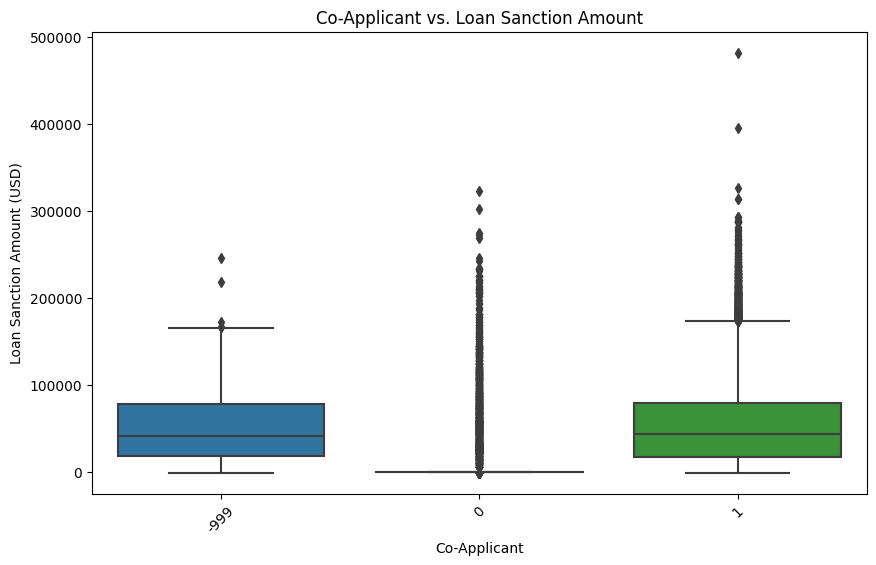

In [20]:
# Relationship between Categorical Features and Loan Sanction Amount
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train, x=feature, y='Loan Sanction Amount (USD)')
    plt.title(f'{feature} vs. Loan Sanction Amount')
    plt.xticks(rotation=45)
    plt.show()

# Pre Processing (Handling missing values, Encoding, Normalization, Standardization)

## Print Columns

In [21]:
train.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

## Print Index

In [22]:
train.index

RangeIndex(start=0, stop=30000, step=1)

## Drop Uncessary Columns

In [23]:
train.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [24]:
train = train.drop(['Customer ID','Name','Gender','Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Dependents','Has Active Credit Card','Property ID','Property Age','Property Type','Property Location','Co-Applicant'],axis=1)

## Print Null Values

In [25]:
train.isna()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Property Price,Loan Sanction Amount (USD)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False
29997,False,True,False,False,True,False,False,False
29998,False,False,False,False,False,False,False,False


In [26]:
arr = np.array(train.columns)
arr

array(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Credit Score', 'No. of Defaults',
       'Property Price', 'Loan Sanction Amount (USD)'], dtype=object)

## Print Columns With NULL Value

In [27]:
train[train['Age'].isna() == True]

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Property Price,Loan Sanction Amount (USD)


## Print Column and NULL Count

In [28]:
for index in range(len(arr)):
    count = train[train[arr[index]].isna() == True].shape[0]
    if(count != 0):
        print(f"{arr[index]}\t{count}")

Income (USD)	4576
Current Loan Expenses (USD)	172
Credit Score	1703
Loan Sanction Amount (USD)	340


## Handling NULL Values

### Fill With Mean Values

In [29]:
train["Age"].fillna(train["Age"].mean(), inplace=True)
train["Income (USD)"].fillna(train["Income (USD)"].mean(), inplace=True)

In [30]:
train["Loan Amount Request (USD)"].fillna(train["Loan Amount Request (USD)"].mean(),inplace=True)
train["Loan Sanction Amount (USD)"].fillna(train["Loan Sanction Amount (USD)"].mean(),inplace=True)
train["Current Loan Expenses (USD)"].fillna(train["Current Loan Expenses (USD)"].mean(),inplace=True)
train["Credit Score"].fillna(train["Credit Score"].mean(),inplace=True)

### Replace Outlier Values

In [31]:
train["Loan Amount Request (USD)"].replace(-999,train["Loan Amount Request (USD)"].mean())
train["Loan Sanction Amount (USD)"].replace(-999,train["Loan Sanction Amount (USD)"].mean())

0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 30000, dtype: float64

## Drop Column To Be Predicted

In [32]:
y = train["Loan Sanction Amount (USD)"]

In [33]:
y

0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 30000, dtype: float64

In [34]:
train = train.drop(["Loan Sanction Amount (USD)"],axis=1)

## Model

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Income (USD)                 30000 non-null  float64
 2   Loan Amount Request (USD)    30000 non-null  float64
 3   Current Loan Expenses (USD)  30000 non-null  float64
 4   Credit Score                 30000 non-null  float64
 5   No. of Defaults              30000 non-null  int64  
 6   Property Price               30000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.6 MB


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import median_absolute_error, explained_variance_score


# Define features (X) and target variable (y)
X = train[['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 
           'Credit Score', 'No. of Defaults', 'Property Price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print('Median Absolute Error:', medae)

# Calculate Explained Variance Score
evs = explained_variance_score(y_test, y_pred)
print('Explained Variance Score:', evs)

# Score the model on the test set
score = model.score(X_test, y_test)
print('Model Score (R-squared):', score)


Mean Squared Error: 956230969.0157363
Mean Absolute Error: 21725.966832074235
R-squared: 0.5766373122374836
Median Absolute Error: 15828.744250770707
Explained Variance Score: 0.5766459138874588
Model Score (R-squared): 0.5766373122374836


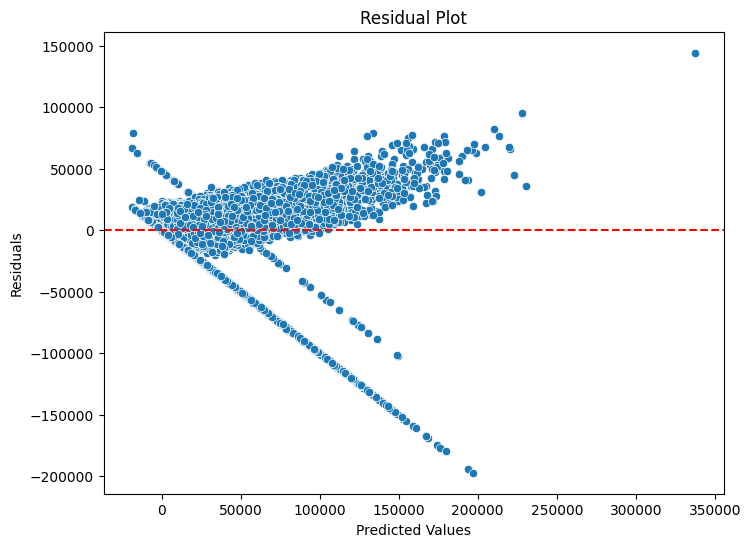

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()




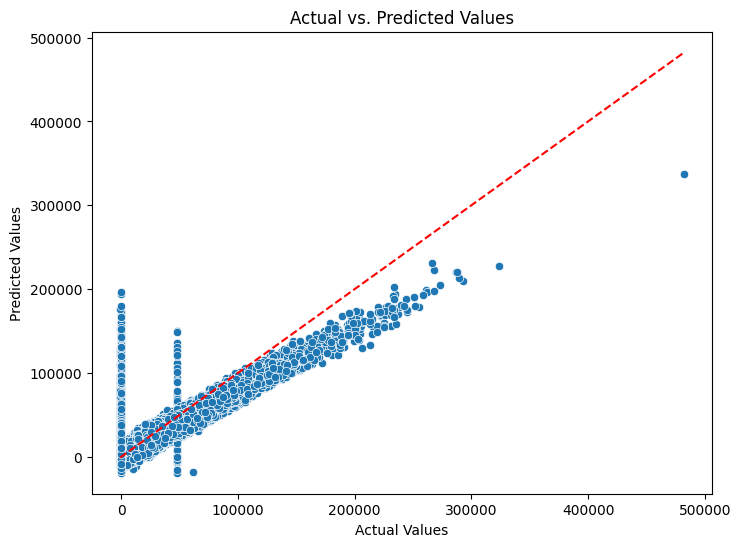

In [53]:
# Actual vs. Predicted Values Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


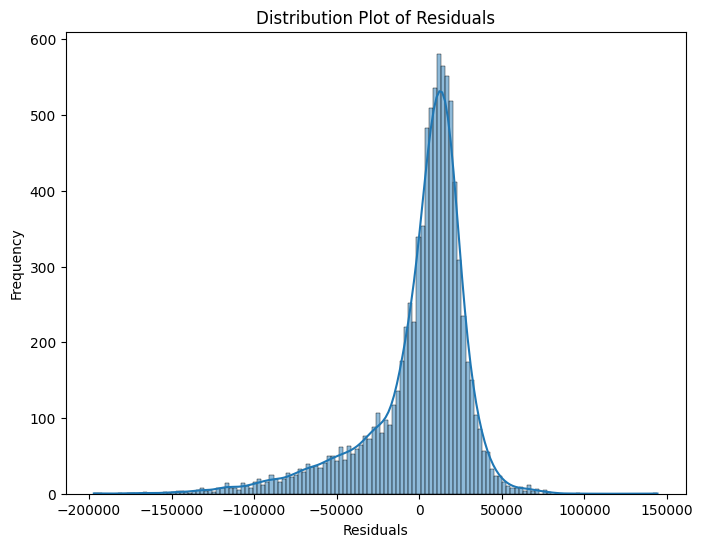

In [54]:
# Distribution Plot of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


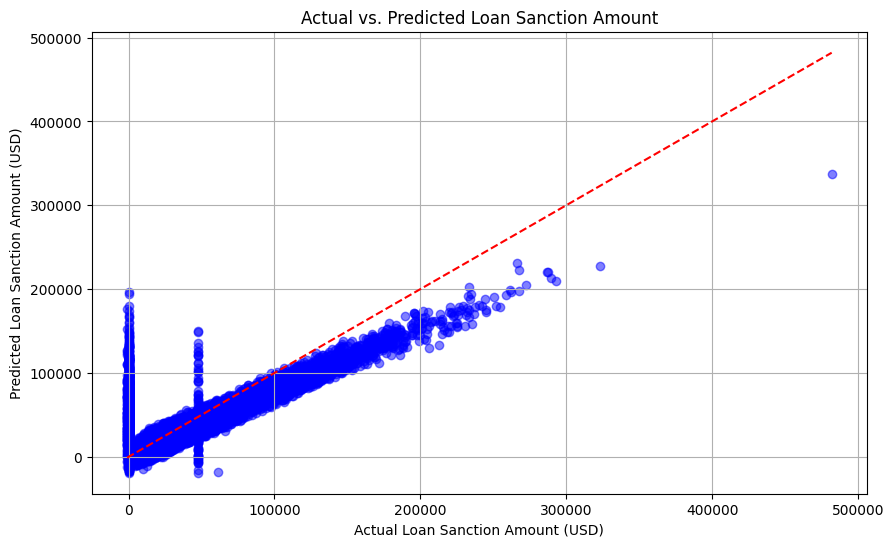

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs. predicted loan sanction amount
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Loan Sanction Amount (USD)')
plt.ylabel('Predicted Loan Sanction Amount (USD)')
plt.title('Actual vs. Predicted Loan Sanction Amount')
plt.grid(True)
plt.show()


## Test

In [42]:
test = pd.read_csv('test.csv')
test.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [43]:
test.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price'],
      dtype='object')

In [48]:
# Preprocess the test data, selecting the same features as in the training data
test_features = test[['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 
                      'Credit Score', 'No. of Defaults', 'Property Price']]

# Replace '?' with NaN
test_features.replace('?', float('nan'), inplace=True)

# Convert object columns to numeric
test_features = test_features.apply(pd.to_numeric, errors='coerce')

# Fill missing values with mean
test_features.fillna(test_features.mean(), inplace=True)

# Make predictions on the processed test data
test_predictions = model.predict(test_features)

# Add the predictions to the test dataframe
test['Predicted Loan Sanction Amount (USD)'] = test_predictions.round(2)

test.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_7052\804723470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features.replace('?', float('nan'), inplace=True)


,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Predicted Loan Sanction Amount (USD)
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5,83448.55
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3,71390.69
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24,76125.08
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1,66779.91
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0,58069.85


In [49]:
test['Predicted Loan Sanction Amount (USD)'] 

0        83448.55
1        71390.69
2        76125.08
3        66779.91
4        58069.85
           ...   
19995    77160.65
19996    20640.12
19997    -3030.66
19998    74005.59
19999    77062.47
Name: Predicted Loan Sanction Amount (USD), Length: 20000, dtype: float64